In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
!unzip "/content/drive/MyDrive/GTSRB - German Traffic Sign Recognition Benchmark.zip" -d "/content/"


Streaming output truncated to the last 5000 lines.
  inflating: /content/train/5/00005_00053_00010.png  
  inflating: /content/train/5/00005_00053_00011.png  
  inflating: /content/train/5/00005_00053_00012.png  
  inflating: /content/train/5/00005_00053_00013.png  
  inflating: /content/train/5/00005_00053_00014.png  
  inflating: /content/train/5/00005_00053_00015.png  
  inflating: /content/train/5/00005_00053_00016.png  
  inflating: /content/train/5/00005_00053_00017.png  
  inflating: /content/train/5/00005_00053_00018.png  
  inflating: /content/train/5/00005_00053_00019.png  
  inflating: /content/train/5/00005_00053_00020.png  
  inflating: /content/train/5/00005_00053_00021.png  
  inflating: /content/train/5/00005_00053_00022.png  
  inflating: /content/train/5/00005_00053_00023.png  
  inflating: /content/train/5/00005_00053_00024.png  
  inflating: /content/train/5/00005_00053_00025.png  
  inflating: /content/train/5/00005_00053_00026.png  
  inflating: /content/train/5/0

In [ ]:
import os

# List extracted contents
print(os.listdir("/content/"))


['.config', 'drive', 'Train', 'Train.csv', 'train', 'meta', 'Meta.csv', 'Meta', 'Test', 'test', 'Test.csv', 'sample_data']


In [ ]:
import os

cur_path = "/content/Train"

# Check the number of images in each class folder
for i in range(43):
    path = os.path.join(cur_path, str(i))
    if os.path.exists(path):
        print(f"Class {i}: {len(os.listdir(path))} images")
    else:
        print(f"Warning: Folder {path} is missing!")


Class 0: 210 images
Class 1: 2220 images
Class 2: 2250 images
Class 3: 1410 images
Class 4: 1980 images
Class 5: 1860 images
Class 6: 420 images
Class 7: 1440 images
Class 8: 1410 images
Class 9: 1470 images
Class 10: 2010 images
Class 11: 1320 images
Class 12: 2100 images
Class 13: 2160 images
Class 14: 780 images
Class 15: 630 images
Class 16: 420 images
Class 17: 1110 images
Class 18: 1200 images
Class 19: 210 images
Class 20: 360 images
Class 21: 330 images
Class 22: 390 images
Class 23: 510 images
Class 24: 270 images
Class 25: 1500 images
Class 26: 600 images
Class 27: 240 images
Class 28: 540 images
Class 29: 270 images
Class 30: 450 images
Class 31: 780 images
Class 32: 240 images
Class 33: 689 images
Class 34: 420 images
Class 35: 1200 images
Class 36: 390 images
Class 37: 210 images
Class 38: 2070 images
Class 39: 300 images
Class 40: 360 images
Class 41: 240 images
Class 42: 240 images


In [ ]:
data = []
labels = []
classes = 43
cur_path = "/content/Train"  # Set the correct dataset path

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path, str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path, a))  # Fixed path handling
            image = image.resize((30, 30))
            image = np.array(image)
            # sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image:", os.path.join(path, a))

print("Dataset loading complete!")
print(f"Total images loaded: {len(data)}")


Dataset loading complete!
Total images loaded: 39209


In [ ]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
print(data.shape, labels.shape) #(Total number of images, height, width, channels)

(39209, 30, 30, 3) (39209,)


In [ ]:
#X contains images and Y contains contain class numbers (0 to 42).

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
#Building the Model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9070 - loss: 0.3091 - val_accuracy: 0.9652 - val_loss: 0.1158
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9080 - loss: 0.2999 - val_accuracy: 0.9652 - val_loss: 0.1181
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9085 - loss: 0.3027 - val_accuracy: 0.9629 - val_loss: 0.1273
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9169 - loss: 0.2776 - val_accuracy: 0.9717 - val_loss: 0.0970
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9167 - loss: 0.2766 - val_accuracy: 0.9742 - val_loss: 0.0911
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9202 - loss: 0.2730 - val_accuracy: 0.9754 - val_loss: 0.0906
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9224 - loss: 0.2608 - val_accuracy: 0.9758 - val_loss: 0.0871
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9197 - loss: 0.2695 - val_accuracy: 0.

In [ ]:
model.save("traffic_sign.h5")

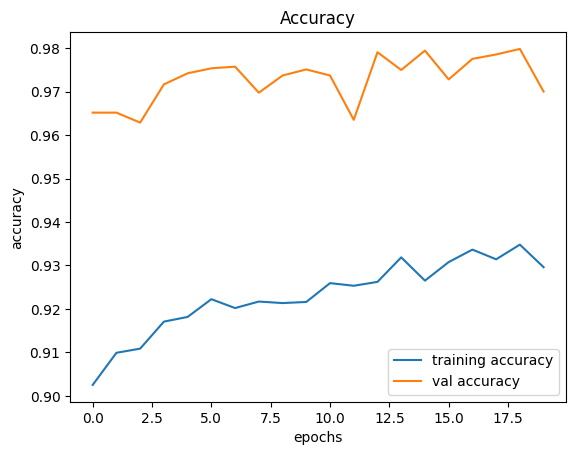

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

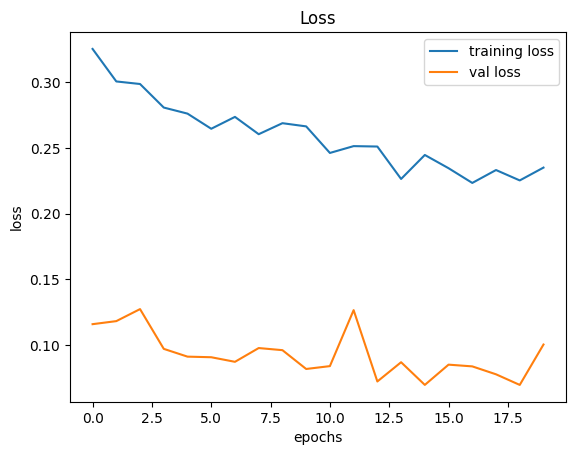

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv("/content/Test.csv")  # Updated path

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []
for img in imgs:
    image = Image.open(os.path.join("/content/", img))  # Updated path handling
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

In [ ]:
pred = np.argmax(model.predict(X_test), axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
print(accuracy_score(labels, pred))

0.9126682501979414
